# Исследование объявлений о продаже квартир

***В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.*** 

**По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.**

- Изучение время продажи квартиры.
- Исключение редких и выбивающиеся значений
- Факторы больше всего влияющие на стоимость квартиры?
- У квартир в Санкт-Петербурге какая область входит в центр
- Сегмент квартир в центре. Влияют ли следующие параметры: площадь, цена, число комнат, высота потолков на цену.


### Шаг 1. Открытие файла с данными и изучение общей информации. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
display(data.head())
data.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

- Пустые значения в living_area, ceiling_height, living_area, is_apartment,balcony, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000,ponds_nearest, days_exposition  
-  Неверный тип данных Почти во всех стобцах
 
 

### Шаг 2. Предобработка данных

In [3]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format= '%Y-%m-%dT%H:%M:%S') # Замена типа значения на datetime64
# Все значения NaN заменяем на 0
data['balcony'] = data['balcony'].fillna(value = 0)
data['days_exposition'] = data['days_exposition'].fillna(value = 0)
data['parks_around3000'] = data['parks_around3000'].fillna(value = 0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(value = 0) 

data['is_apartment'] = data['is_apartment'].astype('bool') # замена типа значения на bool
# Замена типа значения на Int
data['balcony'] = data['balcony'].astype('Int64')
data['last_price'] = data['last_price'].astype('int') 
data['floors_total'] = data['floors_total'].astype('Int64')
data['airports_nearestl'] = data['airports_nearest'].astype('Int64')
data['cityCenters_nearest'] = data['cityCenters_nearest'].astype('Int64')
data['parks_around3000'] = data['parks_around3000'].astype('Int64')
data['parks_nearest'] = data['parks_nearest'].astype('Int64')
data['ponds_around3000'] = data['ponds_around3000'].astype('Int64')
data['ponds_nearest'] = data['ponds_nearest'].astype('Int64')
data['airports_nearest'] = data['airports_nearest'].astype('Int64')
data['days_exposition'] = data['days_exposition'].astype('int')

ceiling_height_avg = data['ceiling_height'].median() # Медиана
living_area_avg = data['living_area'].median() # Медиана
kitchen_area_avg = data['kitchen_area'].median() # Медиана
data['ceiling_height'] = data['ceiling_height'].fillna(value = ceiling_height_avg) # замена пропусщеных значений на ceiling_height_avg
data['living_area'] = data['living_area'].fillna(value = living_area_avg) # замена пропусщеных значений на living_area_avg
data['kitchen_area'] = data['kitchen_area'].fillna(value = kitchen_area_avg) # замена пропусщеных значений на kitchen_area_avg
data = data.drop_duplicates().reset_index(drop=True) # Удаление дубликатов

In [4]:
data.dtypes

total_images                     int64
last_price                       int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     Int64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          Int64
locality_name                   object
airports_nearest                 Int64
cityCenters_nearest              Int64
parks_around3000                 Int64
parks_nearest                    Int64
ponds_around3000                 Int64
ponds_nearest                    Int64
days_exposition                  int64
airports_nearestl                Int64
dtype: object

### Шаг 3. Посчитать и добавьть в таблицу

In [5]:
data['square_meter_price'] = (data['last_price'] // data['total_area']).astype('int') # Цена квадратного метра 
data['weekday'] = data['first_day_exposition'].dt.weekday # День недели
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year # Год
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month # Месяц


"""
Возвращает тип этажа по значению floor и floors_total используя правила:

- 'последний' при floor == floors_total

- 'первый' при floor == 1

- 'другой' при остальнх значениях
"""
def apartment_floor(row): 

    floors_total = row['floors_total']
    floor = row['floor']

    if floor == floors_total:
        return 'последний'
    
    if  floor == 1:
        return 'первый'

    return 'другой'
data['apartment_floor'] = data.apply(apartment_floor, axis=1) # создаем столбец с полученными значениями
data['living_total'] = (data['living_area'] / data['total_area']) # соотношение жилой и общей площади
data['kitchen_total'] = (data['kitchen_area'] / data['total_area']) # отношение площади кухни к общей
display(data)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,airports_nearestl,square_meter_price,weekday,year,month,apartment_floor,living_total,kitchen_total
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.0,8,True,...,755,0,18863,120370,3,2019,3,другой,0.472222,0.231481
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.6,1,True,...,NaN,81,12817,82920,1,2018,12,первый,0.460396,0.272277
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.3,4,True,...,574,558,21741,92785,3,2015,8,другой,0.612500,0.148214
3,0,64900000,159.00,2015-07-24,3,2.65,14,30.0,9,True,...,234,424,28098,408176,4,2015,7,другой,0.188679,0.057233
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.0,13,True,...,48,121,31856,100000,1,2018,6,другой,0.320000,0.410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.3,3,True,...,381,0,24665,72490,1,2017,3,другой,0.547792,0.103356
23695,14,3100000,59.00,2018-01-15,3,2.65,5,38.0,4,True,...,NaN,45,NaN,52542,0,2018,1,другой,0.644068,0.144068
23696,18,2500000,56.70,2018-02-11,2,2.65,3,29.7,1,True,...,NaN,0,NaN,44091,6,2018,2,первый,0.523810,0.160494
23697,13,11475000,76.75,2017-03-28,2,3.00,17,30.0,12,True,...,196,602,39140,149511,1,2017,3,другой,0.390879,0.303583


### Шаг 4. Провести исследовательский анализ данных и выполнить инструкции:

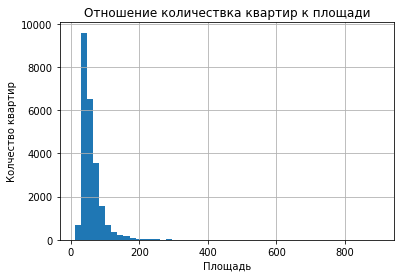

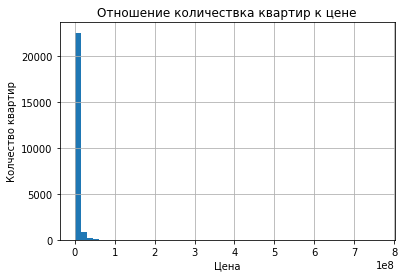

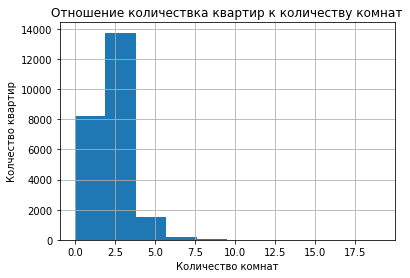

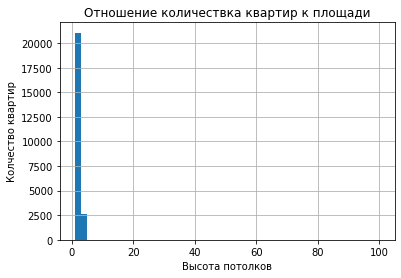

In [6]:
plt.xlabel('Площадь')
plt.ylabel('Колчество квартир')
plt.title('Отношение количествка квартир к площади')
data['total_area'].hist(bins=50) # Гисторамма Площади квартир  
plt.show()
plt.xlabel('Цена')
plt.ylabel('Колчество квартир')
plt.title('Отношение количествка квартир к цене')
data['last_price'].hist(bins=50) # Гисторамма цены квартир 
plt.show()
plt.xlabel('Количество комнат')
plt.ylabel('Колчество квартир')
plt.title('Отношение количествка квартир к количеству комнат')
data['rooms'].hist(bins=10) # Гисторамма комнат в квартирах 
plt.show()
plt.xlabel('Высота потолков')
plt.ylabel('Колчество квартир')
plt.title('Отношение количествка квартир к площади')
data['ceiling_height'].hist(bins=50) # Гисторамма высоты потолков


***Средняя площадь квартир около 50 метров Самые частые квартиры имеют 2-3 комнаты Средняя высота потолков чуть больше 2.5 метров В гистограмме с ценой очень большой разброс(Есть очень дешевая недвижимость и очень дорогая)***

74.0
156.60884425503187


0.25      22.0
0.50      74.0
0.75     199.0
1.00    1580.0
Name: days_exposition, dtype: float64

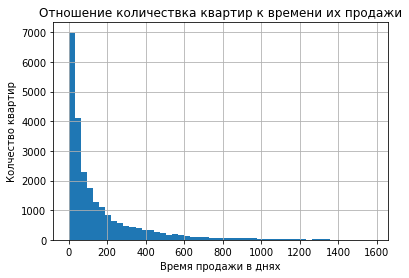

In [7]:
plt.xlabel('Время продажи в днях')
plt.ylabel('Колчество квартир')
plt.title('Отношение количествка квартир к времени их продажи')
data['days_exposition'].hist(bins=50) # Гисторамма времени продажи квартир 
print(data['days_exposition'].median()) # Медиана 
print(data['days_exposition'].mean()) # Среднее
data['days_exposition'].quantile([0.25, 0.5, 0.75, 1]) #50%-ый квантиль == медиане

***Имеются очень большие выбросы. больше 500 дней думаю это связано с неликвидной недвижемостью или люди посто забывают снимать обявления с площадок.
Больше всего квартир продаются в течение 3 месяцев.
Быстро это в течение меясца, а вот долго это болше полугода***

0.25     47.1
0.50     59.0
0.75     75.0
1.00    200.0
Name: total_area, dtype: float64
900.0


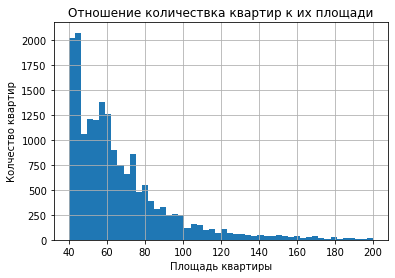

In [8]:
plt.xlabel('Площадь квартиры')
plt.ylabel('Колчество квартир')
plt.title('Отношение количествка квартир к их площади')
good_data = data.query('40 <= total_area <= 200') # Убираем слишком мелнькие и слишком большие значения 
print(good_data['total_area'].quantile([0.25, 0.5, 0.75, 1])) #50%-ый квантиль == медиане
good_data['total_area'].hist(bins=50) # Строим гитограмму
print(data['total_area'].max()) # Максимальное значение

***Средняя площадь квартир от 30 до 70 метров(Так-же присутствуют довольно большие квартиры до 900 метров)***


200 это то число после которого идут большие выбросы. Высчитал я его с помощью 75% квантиля.

0.25     4950000.0
0.50     6200000.0
0.75     8541000.0
1.00    30000000.0
Name: last_price, dtype: float64
763000000


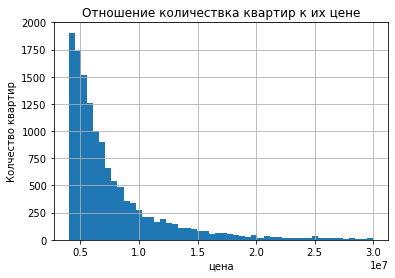

In [9]:
plt.xlabel('цена')
plt.ylabel('Колчество квартир')
plt.title('Отношение количествка квартир к их цене')
good_data = good_data.query('4000000 <= last_price <= 30000000') # Убираем слишком мелнькие и слишком большие значения 
print(good_data['last_price'].quantile([0.25, 0.5, 0.75, 1])) #50%-ый квантиль == медиане 
good_data['last_price'].hist(bins=50) # Строим гитограмму
print(data['last_price'].max()) # Максимальное значение


Средняя цена квартир от 2 до 5 миллионов(Так-же присутствуют довольно большие квартиры до 763 миллионов)

100.0


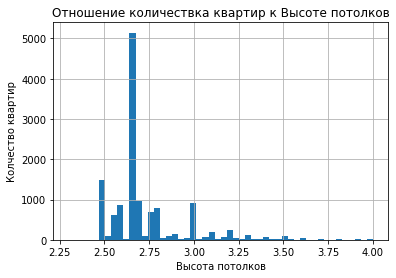

In [10]:
plt.xlabel('Высота потолков')
plt.ylabel('Колчество квартир')
plt.title('Отношение количествка квартир к Высоте потолков')
good_data = good_data.query('2.3 <= ceiling_height <= 4') # Убираем слишком мелнькие и слишком большие значения 
good_data['ceiling_height'].quantile([0.25, 0.5, 0.75, 1]) #50%-ый квантиль == медиане
good_data['ceiling_height'].hist(bins=50) # Строим гитограмму
print(data['ceiling_height'].max()) # Максимальное значение

***В этой таблице очень аномальные разбросы. Есть почти километровые потолки.
Самые частая высота потолков это от 2.5 до 2.7 метров.***


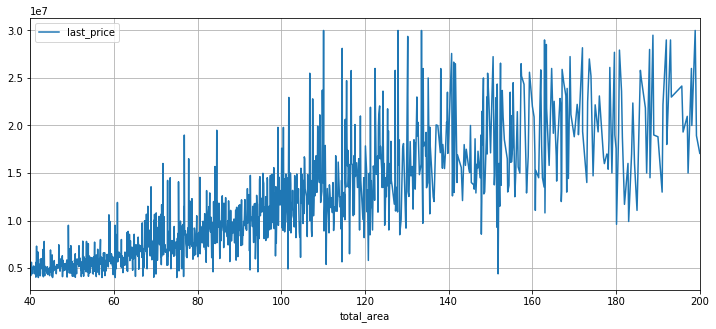

In [11]:
price_area_dependency = good_data[['last_price', 'total_area']] # берем из датафренйма только нужные толбцы
price_area_dependency.pivot_table(index='total_area', values='last_price').plot(grid=True, figsize=(12, 5)) # график зависемости цены от площади

***Цена зависит от размера квартиры. Чем больше площадь, тем больше цена***

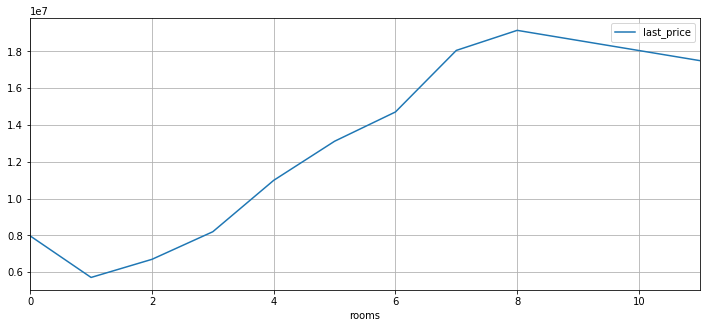

In [12]:
price_rooms_dependency = good_data[['last_price', 'rooms']] # берем из датафренйма только нужные толбцы
price_rooms_dependency.pivot_table(index='rooms', values='last_price').plot(grid=True, figsize=(12, 5)) # график зависемости цены от колчества комнат

***Самые дорогие квартиры с 8 комнатами и цена тоже сильно зависит от количества комнат***

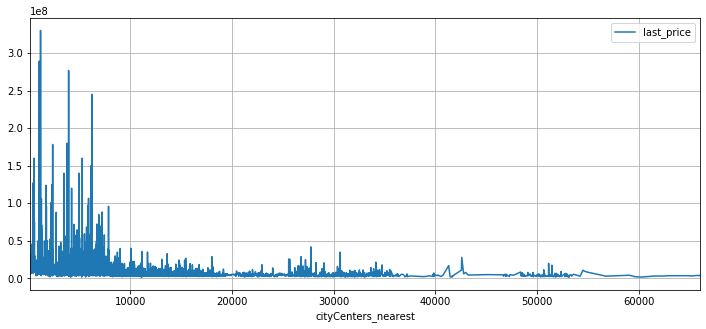

In [13]:
price_cityCenters_dependency = data[['last_price', 'cityCenters_nearest']] # берем из датафренйма только нужные толбцы
price_cityCenters_dependency.pivot_table(index='cityCenters_nearest', values='last_price').plot(grid=True, figsize=(12, 5)) # график зависемости цены от удаленности от центра

***Удаленность о центра влияет на цену, но чем дальше тем цена почти не меняется***

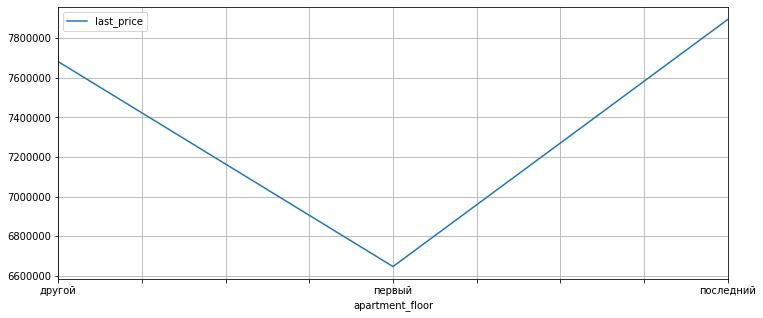

In [14]:
price_apartment_dependency = good_data[['last_price', 'apartment_floor']] # берем из датафренйма только нужные толбцы
price_apartment_dependency.pivot_table(index='apartment_floor', values='last_price').plot(grid=True, figsize=(12, 5)) # график зависемости цены от этажа квартры

***Самый дешевые квартиры на первом этаже, а вот на последнем и остальных стоят примерно одинаково
( Я думаю это связано с решетками на окнах и шумом ).***

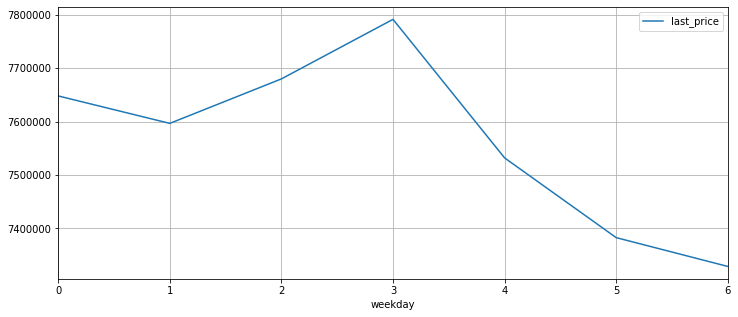

In [15]:
price_weekday_dependency = good_data[['last_price', 'weekday']] # берем из датафренйма только нужные толбцы
price_weekday_dependency.pivot_table(index='weekday', values='last_price').plot(grid=True, figsize=(12, 5)) # график зависемости цены от дня недели публикации

***Самые дорогие квартиры выставляют на продажу в будничные дни.***

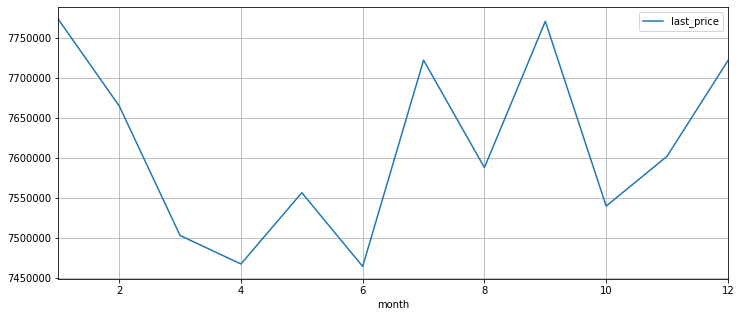

In [16]:
price_month_dependency = good_data[['last_price', 'month']] # берем из датафренйма только нужные толбцы
price_month_dependency.pivot_table(index='month', values='last_price').plot(grid=True, figsize=(12, 5)) # график зависемости цены от месяца публикации

***Самые дешевые квартиры выставляются с конца весны и начала лета. В остальные месяцы примно одинаков***

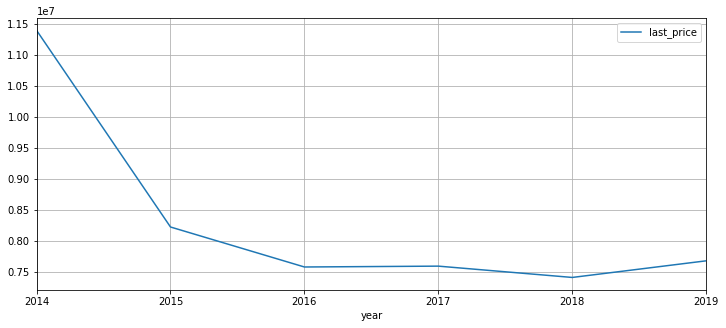

In [17]:
price_year_dependency = good_data[['last_price', 'year']] # берем из датафренйма только нужные толбцы
price_year_dependency.pivot_table(index='year', values='last_price').plot(grid=True, figsize=(12, 5)) # график зависемости цены от года публикаци

***Вывод:***

- Цена зависит от размера квартиры. Так же количество комнат тоже сильно влияет на цену,
- Но как не странно квартиры в самом центре и на окраине центральной части города стоят примерно одинаково.
- Самый дешевые квартиры на первом этаже, а вот на последнем и остальных стоят примерно одинаково ( Я думаю это связано с решетками на окнах и шумом ). 
- Самые дорогие квартиры выставляют на продажу в будничные дни.
- Самые дешевые квартиры выставляются с конца весны и начала лета.
- Год публикации на цену не влияет 
- Стоимость жилья упала с 2014 по 2015 и начала немного востанавливаться с 2018 по 2019



Санкт-Петербург      10984
Пушкин                 242
посёлок Шушары         213
посёлок Парголово      156
посёлок Мурино         153
Всеволожск             142
Сестрорецк             134
Колпино                122
деревня Кудрово        121
Петергоф                89
Name: locality_name, dtype: int64


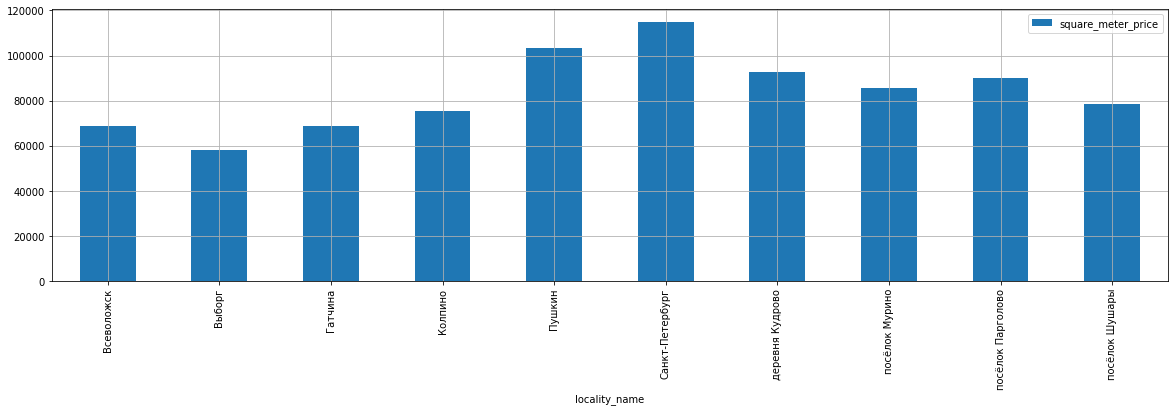

In [18]:
print(good_data['locality_name'].value_counts().head(10)) # Количество квартир в разных городах
top_city = data.pivot_table(index="locality_name", values="square_meter_price", aggfunc=['mean','count']) # среднее значене и количество квартир по городам
top_city.columns = [ 'square_meter_price', 'count'] # названия столбцов
top_city = top_city.query('count >= 234') # все значения где квартир больше 234
top_city = top_city.sort_values('count', ascending = False) # В порядке убывания 
top_city.pivot_table(index="locality_name", values= 'square_meter_price').plot(kind="bar", grid=True, figsize=(20, 5)) # график средней цены по каждому городу

***Самый дорогой город для жизни это Санкт-Питербург, а вот самый дешовый Выборг***

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


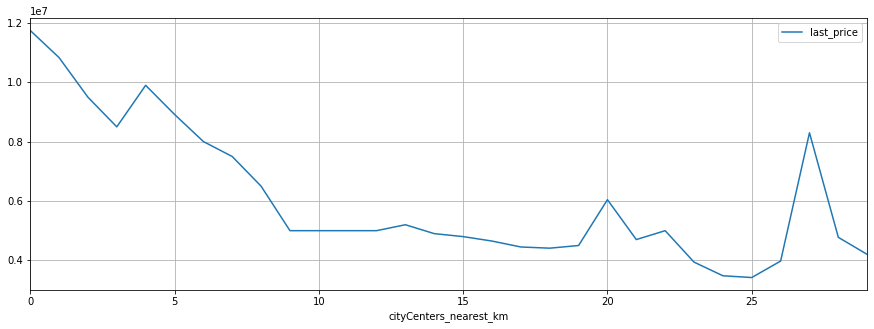

In [19]:
data_piter = data.query('locality_name in ("Санкт-Петербург")') # Только квартиры в Питире 
data_piter['cityCenters_nearest_km'] = data_piter['cityCenters_nearest'] // 1000  # Делаем расстояние в километрах
Center_km = data_piter.pivot_table(index="cityCenters_nearest_km", values="last_price", aggfunc=['median']) # ищем медиану расстояния до центра
Center_km.pivot_table(index='cityCenters_nearest_km', values='median').plot(grid=True, figsize=(15, 5)) # график отношения цены и удаленности от центра города 

***Центральная зона находиться на растояни 3-4 километров от центра города.***

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


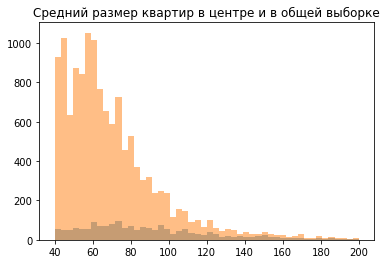

82.15
63.2


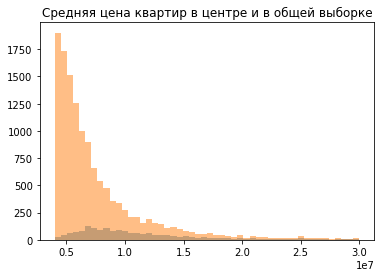

9500000.0
6200000.0


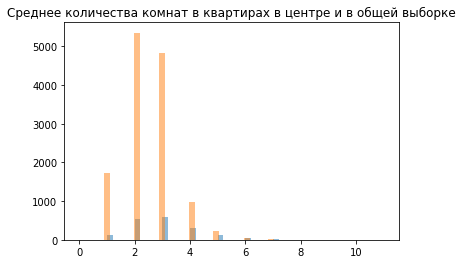

3.0
2.0


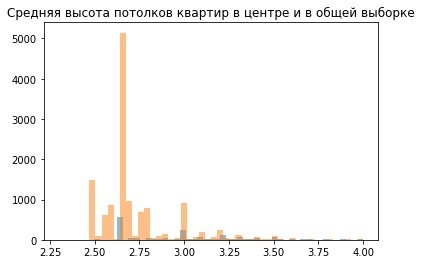

3.0
2.65


In [20]:
data_sentr = good_data.query('locality_name in ("Санкт-Петербург")') # Только квартиры в Питире 
data_sentr['cityCenters_nearest_km'] = data['cityCenters_nearest'] // 1000 # Делаем расстояние в километрах
data_sentr = data_sentr.query('cityCenters_nearest_km <= 4') # Растояние не должно превышать 9 километров 

plt.title('Средний размер квартир в центре и в общей выборке')
x = data_sentr['total_area'] #центр
y = good_data['total_area'] #Вся выборка

plt.hist(x, bins = 50, alpha=0.5, label='Центр')
plt.hist(y, bins = 50, alpha=0.5, label='Вся выборка')
plt.show()
print(data_sentr['total_area'].median()) # Медиана центр 
print(good_data['total_area'].median()) # Медиана всех квартир


plt.title('Средняя цена квартир в центре и в общей выборке')
x = data_sentr['last_price'] #центр
y = good_data['last_price'] #Вся выборка

plt.hist(x, bins = 50, alpha=0.5, label='Центр')
plt.hist(y, bins = 50, alpha=0.5, label='Вся выборка')
plt.show()
print(data_sentr['last_price'].median()) # Медиана центр
print(good_data['last_price'].median()) # Медиана всех квартир


plt.title('Среднее количества комнат в квартирах в центре и в общей выборке')
x = data_sentr['rooms'] #центр
y = good_data['rooms'] #Вся выборка

plt.hist(x, bins = 50, alpha=0.5, label='Центр')
plt.hist(y, bins = 50, alpha=0.5, label='Вся выборка')
plt.show()
print(data_sentr['rooms'].median()) # Медиана центр
print(good_data['rooms'].median()) # Медиана всех квартир


plt.title('Средняя высота потолков квартир в центре и в общей выборке')
x = data_sentr['ceiling_height'] #центр
y = good_data['ceiling_height'] #Вся выборка

plt.hist(x, bins = 50, alpha=0.5, label='Центр')
plt.hist(y, bins = 50, alpha=0.5, label='Вся выборка')
plt.show()
print(data_sentr['ceiling_height'].median()) # Медиана центр
print(good_data['ceiling_height'].median()) # Медиана всех квартир

***Гистограммы похожи, но квартиры центре во всем чуть лучше. Кроме цены***

Text(0.5, 1.0, 'Отношение площади к цене')

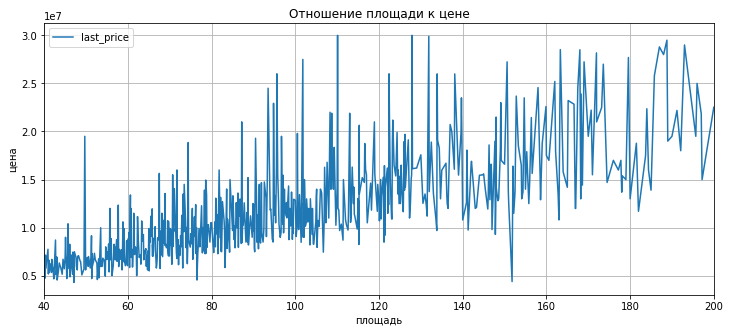

In [21]:
data_sentr.pivot_table(index='total_area', values='last_price').plot(grid=True, figsize=(12, 5))# график зависимости цены от площади
plt.xlabel('площадь')
plt.ylabel('цена')
plt.title('Отношение площади к цене')

Text(0.5, 1.0, 'Отношение количества комнат к цене')

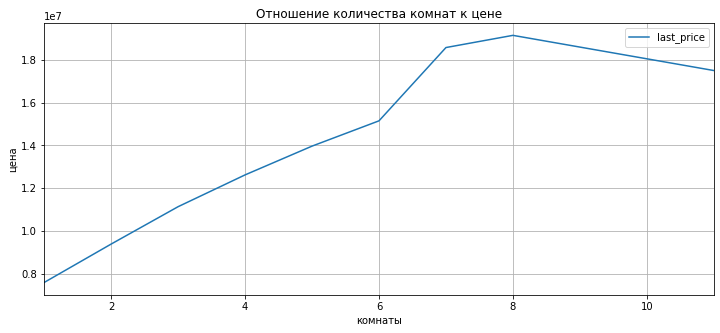

In [22]:
data_sentr.pivot_table(index='rooms', values='last_price').plot(grid=True, figsize=(12, 5)) # график зависимости цены от количества комнат
plt.xlabel('комнаты')
plt.ylabel('цена')
plt.title('Отношение количества комнат к цене')

Text(0.5, 1.0, 'Отношение растония до центра к цене')

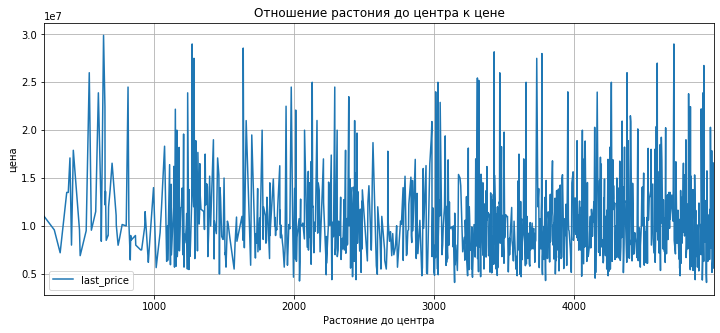

In [23]:
data_sentr.pivot_table(index='cityCenters_nearest', values='last_price').plot(grid=True, figsize=(12, 5)) # график зависимости цены от удаленности от центра
plt.xlabel('Растояние до центра')
plt.ylabel('цена')
plt.title('Отношение растония до центра к цене')

Text(0.5, 1.0, 'Отношение этажа к цене')

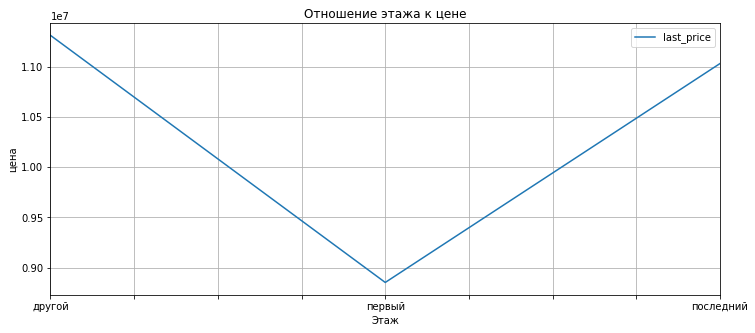

In [24]:
data_sentr.pivot_table(index='apartment_floor', values='last_price').plot(grid=True, figsize=(12, 5)) # график зависимости цены от этажа
plt.xlabel('Этаж')
plt.ylabel('цена')
plt.title('Отношение этажа к цене')

Text(0.5, 1.0, 'Отношение дня недели к цене')

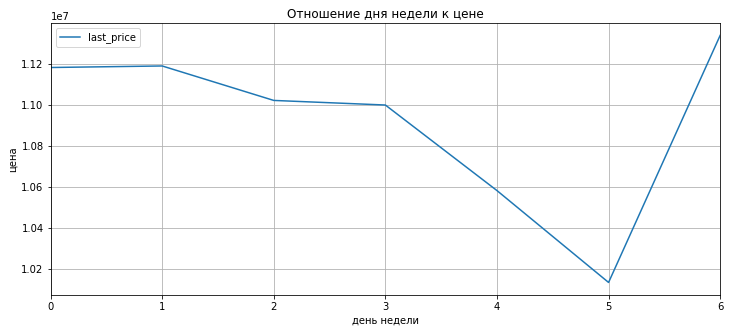

In [25]:
data_sentr.pivot_table(index='weekday', values='last_price').plot(grid=True, figsize=(12, 5)) # график зависимости цены от  дня недели когда она была продана 
plt.xlabel('день недели')
plt.ylabel('цена')
plt.title('Отношение дня недели к цене')

Text(0.5, 1.0, 'Отношение месяца к цене')

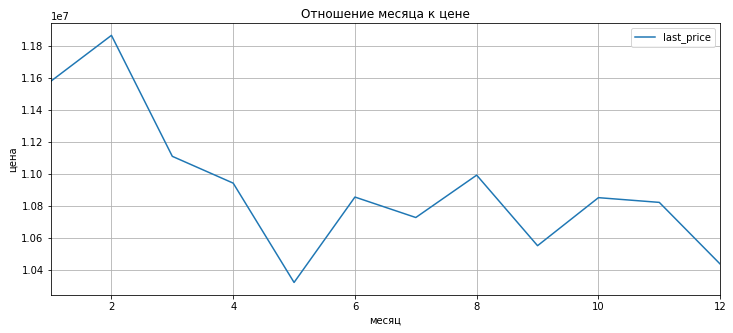

In [26]:
data_sentr.pivot_table(index='month', values='last_price').plot(grid=True, figsize=(12, 5)) # график зависимости цены от месяца когда она была продана 
plt.xlabel('месяц')
plt.ylabel('цена')
plt.title('Отношение месяца к цене')

Text(0.5, 1.0, 'Отношение года к цене')

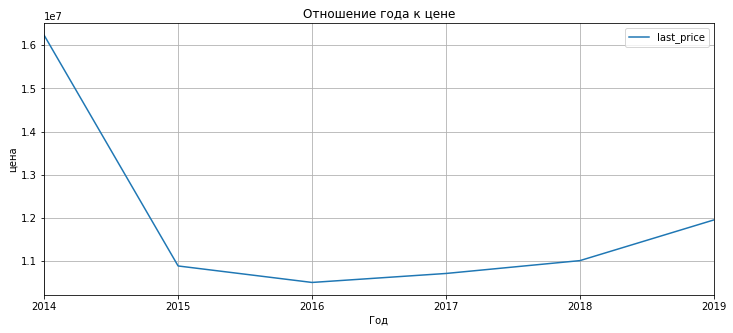

In [27]:
data_sentr.pivot_table(index='year', values='last_price').plot(grid=True, figsize=(12, 5)) # график зависимости цены от года когда она была продана
plt.xlabel('Год')
plt.ylabel('цена')
plt.title('Отношение года к цене')

- Жители центра продают более дешовую недвижемость в выходные  
- Так же самые дешовые квартиры продаются не только в конце весны, но и зимой под новый год
- Еще наглядно видно что чем дальше от центра чем дешевле. 


### Шаг 5. Общий вывод

***На цену квартиры влияет все. От расстояния до центра, до количества комнат.***
- Самые важные параметры это количество комнат и площадь квартиры.
- Самые дешовые квартры находяться на первом этаже
- Квартиры в центре дороже и маленьше по площади.
- Самые дорогие квартры в Питере, а вот самые дешовые в Выборге
